# MNIST

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pickle
import os
import time
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.manifold import TSNE
from sklearn.model_selection import StratifiedKFold
from statistics import mean
from sklearn.neighbors import KNeighborsClassifier
from keras.datasets import mnist, cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [8]:
X_train = X_train.reshape(-1, 784)
X_train = X_train.astype('float32')
X_test = X_test.reshape(-1, 784)
X_test = X_test.astype('float32')

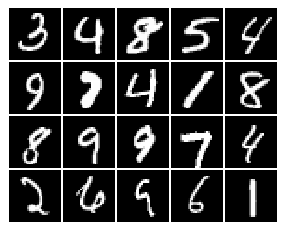

In [14]:
from display_network import *
N = 20
X = X_train[np.random.choice(X_train.shape[0], N)]/255
plt.axis('off')
A = display_network(X.T, 4, 5)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.savefig('image/mnist_ex.png', bbox_inches='tight', dpi = 400)
plt.show()

In [4]:
# normalize
X_train /= 255
X_test /= 255
print('Train samples:', X_train.shape)
print('Test samples:', X_test.shape)

Train samples: (60000, 784)
Test samples: (10000, 784)


## Train

In [9]:
# Save train time each model
train_times = []

In [10]:
# Mô hình KNN với K = 30 và sử dụng khoảng cách Euclide
knn = KNeighborsClassifier(n_neighbors=30, metric='euclidean')
start = time.time()
knn.fit(X_train, y_train)
tmp = time.time() - start
train_times.append(tmp)
print('Huấn luyện xong KNN sau {:.2f}s'.format(tmp))

Huấn luyện xong KNN sau 0.07s


In [11]:
# Mô hình Multinomial Naive Bayes với alpha = 0.005
mnb = MultinomialNB(alpha=0.005)
start = time.time()
mnb.fit(X_train, y_train)
tmp = time.time() - start
train_times.append(tmp)
print('Huấn luyện xong Multinomial Naive Bayes sau {:.2f}s'.format(tmp))

Huấn luyện xong Multinomial Naive Bayes sau 1.26s


In [12]:
# Mô hình Softmax Regression phương pháp hiệu chỉnh L2, C = 16
lreg = LogisticRegression(C=16, solver='lbfgs', multi_class='multinomial', max_iter=10_000)
start = time.time()
lreg.fit(X_train, y_train)
tmp = time.time() - start
train_times.append(tmp)
print('Huấn luyện xong Softmax Regression sau {:.2f}s'.format(tmp))

Huấn luyện xong Softmax Regression sau 574.40s


In [13]:
# Mô hình SVM sử dụng hàm linear và C = 10
svm = SVC(C=10, kernel='linear')
start = time.time()
svm.fit(X_train, y_train)
tmp = time.time() - start
train_times.append(tmp)
print('Huấn luyện xong SVM sau {:.2f}s'.format(tmp))

Huấn luyện xong SVM sau 415.84s


## Evaluate models

In [15]:
# save scores each model
accuracy_scores = []
f1_scores = []

In [17]:
# KNN
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy_scores.append(acc)
f1_scores.append(f1)
print('KNN:')
print('Accuracy score: {:.3f} %'.format(acc * 100))
print('F1 score:       {:.3f} %'.format(f1 * 100))

KNN:
Accuracy score: 95.960 %
F1 score:       95.972 %


In [18]:
# MNB
y_pred = mnb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy_scores.append(acc)
f1_scores.append(f1)
print('MNB:')
print('Accuracy score: {:.3f} %'.format(acc * 100))
print('F1 score:       {:.3f} %'.format(f1 * 100))

MNB:
Accuracy score: 83.620 %
F1 score:       83.471 %


In [19]:
# Softmax
y_pred = lreg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy_scores.append(acc)
f1_scores.append(f1)
print('Softmax:')
print('Accuracy score: {:.3f} %'.format(acc * 100))
print('F1 score:       {:.3f} %'.format(f1 * 100))

Softmax:
Accuracy score: 92.300 %
F1 score:       92.196 %


In [20]:
# SVM
y_pred = svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy_scores.append(acc)
f1_scores.append(f1)
print('SVM:')
print('Accuracy score: {:.3f} %'.format(acc * 100))
print('F1 score:       {:.3f} %'.format(f1 * 100))

SVM:
Accuracy score: 93.110 %
F1 score:       93.003 %


## Visualization

In [21]:
models = np.array(['KNN', 'Multinomial NB', 'Softmax Regression', 'SVM'])

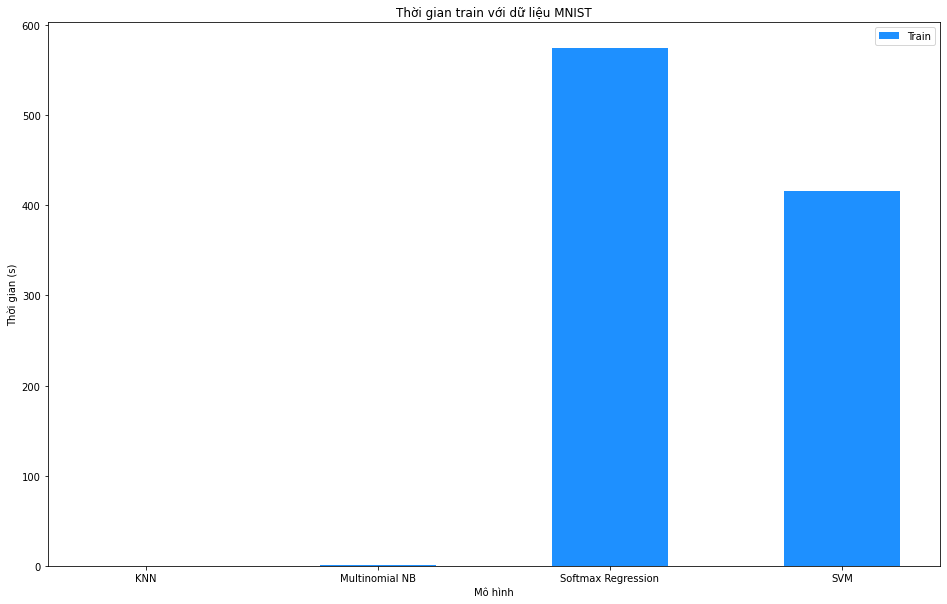

In [25]:
# Về thời gian
plt.figure(figsize=(16, 10))
plt.title('Thời gian train với dữ liệu MNIST')
plt.xlabel('Mô hình')
plt.ylabel('Thời gian (s)')
plt.bar(models, np.array(train_times), color='dodgerblue', width=0.5, label='Train')
plt.legend(loc='best')
plt.savefig('image/mnist_time_comparision.png', facecolor='whitesmoke')
plt.show()

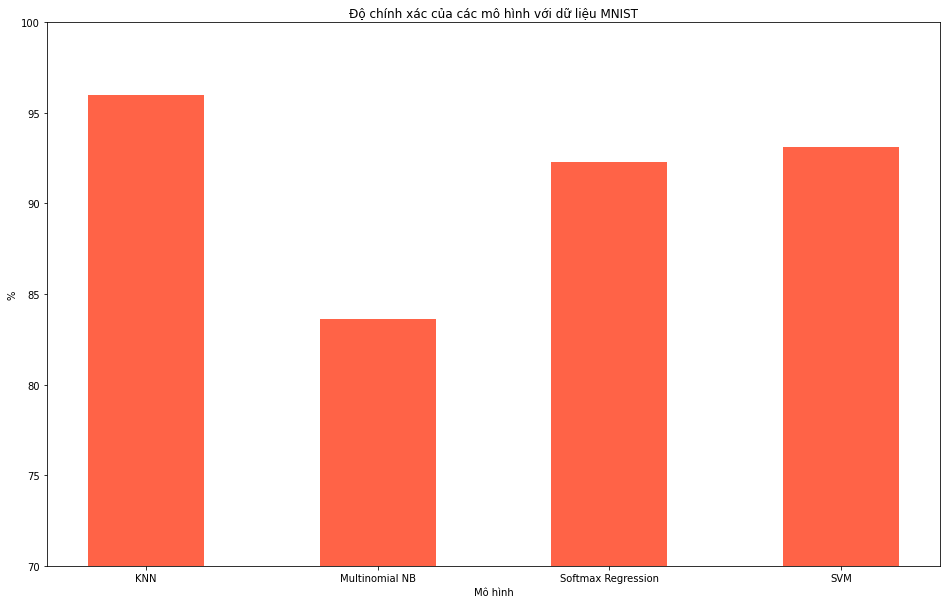

In [26]:
# Về độ chính xác
plt.figure(figsize=(16, 10))
plt.title('Độ chính xác của các mô hình với dữ liệu MNIST')
plt.xlabel('Mô hình')
plt.ylabel('%')
plt.ylim(70, 100)
plt.bar(models, np.array(accuracy_scores) * 100, color='tomato', width=0.5, label='Accuracy')
plt.savefig('image/mnist_accuracy_comparision.png', facecolor='whitesmoke')
plt.show()

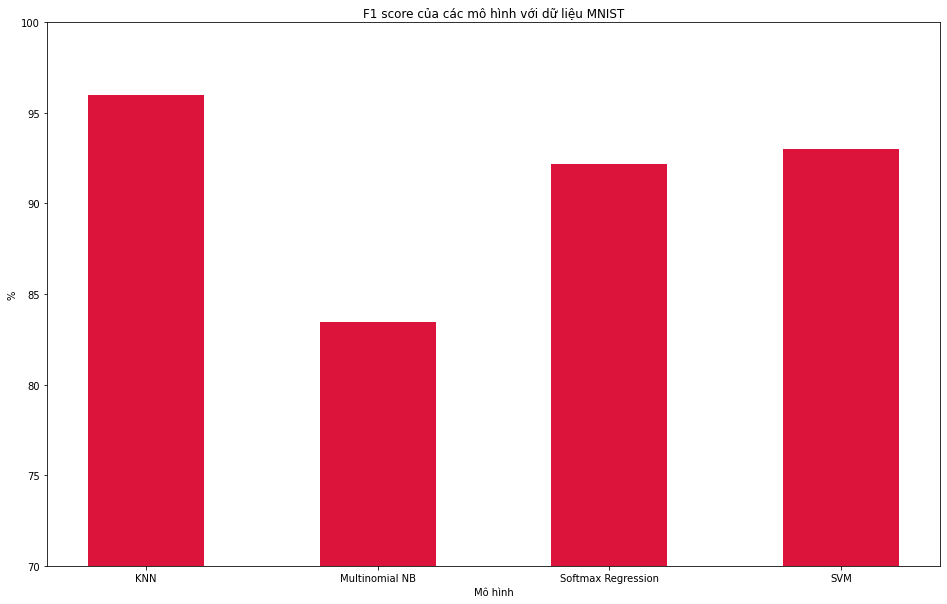

In [27]:
# Về F1 score
plt.figure(figsize=(16, 10))
plt.title('F1 score của các mô hình với dữ liệu MNIST')
plt.xlabel('Mô hình')
plt.ylabel('%')
plt.ylim(70, 100)
plt.bar(models, np.array(f1_scores) * 100, color='crimson', width=0.5, label='F1')
plt.savefig('image/mnist_f1_comparision.png', facecolor='whitesmoke')
plt.show()

# CIFAR10

In [53]:
from keras.applications import VGG16, imagenet_utils
import cv2
import tensorflow as tf

In [142]:
(X_train_raw, y_train), (X_test_raw, y_test) = cifar10.load_data()
print(X_train_raw.shape, X_test_raw.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


## Feature Extractor

In [112]:
X_train = np.zeros((50000, 224, 224, 3), dtype=np.uint8)
for i in range(X_train_raw.shape[0]):
    X_train[i] = cv2.resize(X_train_raw[i], (224, 224))
    X_train[i] = imagenet_utils.preprocess_input(X_train[i])

print(X_train.shape)

(50000, 224, 224, 3)


In [114]:
# Load model VGG 16 của ImageNet dataset, include_top=False để bỏ phần Fully connected layer ở cuối.
model = VGG16(weights='imagenet', include_top=False)

In [115]:
# Dùng pre-trained model để lấy ra các feature của ảnh
features = model.predict(X_train)

# Giống bước flatten trong CNN, chuyển từ tensor 3 chiều sau ConvNet sang vector 1 chiều
features = features.reshape((features.shape[0], 512*7*7))

  30/1563 [..............................] - ETA: 2:45:13

KeyboardInterrupt: 

## Train

In [152]:
features = np.array(pickle.load(open('data/saved/train_features.sav', 'rb')))
y_train = np.array(pickle.load(open('data/saved/y_train.sav', 'rb')))

In [137]:
# Save train time each model
train_times = []

In [139]:
# Mô hình KNN với K = 30 và sử dụng khoảng cách Euclide
knn = KNeighborsClassifier(n_neighbors=30, metric='euclidean')
start = time.time()
knn.fit(features, y_train)
tmp = time.time() - start
train_times.append(tmp)
print('Huấn luyện xong KNN sau {:.2f}s'.format(tmp))

Huấn luyện xong KNN sau 0.49s


In [140]:
# Mô hình Multinomial Naive Bayes với alpha = 0.005
mnb = MultinomialNB(alpha=0.005)
start = time.time()
mnb.fit(features, y_train)
tmp = time.time() - start
train_times.append(tmp)
print('Huấn luyện xong Multinomial Naive Bayes sau {:.2f}s'.format(tmp))

Huấn luyện xong Multinomial Naive Bayes sau 2.52s


In [141]:
# Mô hình Softmax Regression phương pháp hiệu chỉnh L2, C = 16
lreg = LogisticRegression(C=16, solver='lbfgs', multi_class='multinomial', max_iter=10_000)
start = time.time()
lreg.fit(features, y_train)
tmp = time.time() - start
train_times.append(tmp)
print('Huấn luyện xong Softmax Regression sau {:.2f}s'.format(tmp))

Huấn luyện xong Softmax Regression sau 530.62s


In [153]:
# Mô hình SVM sử dụng hàm linear và C = 10
svm = SVC(C=10, kernel='linear')
start = time.time()
svm.fit(features, y_train)
tmp = time.time() - start
train_times.append(tmp)
print('Huấn luyện xong SVM sau {:.2f}s'.format(tmp))

Huấn luyện xong SVM sau 7586.60s


## Evaluate

In [143]:
test_features = np.array(pickle.load(open('data/saved/test_features.sav', 'rb')))

In [145]:
accuracy_scores = []
f1_scores = []

In [146]:
# KNN
y_pred = knn.predict(test_features)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy_scores.append(acc)
f1_scores.append(f1)
print('KNN:')
print('Accuracy score: {:.3f} %'.format(acc * 100))
print('F1 score:       {:.3f} %'.format(f1 * 100))

KNN:
Accuracy score: 24.660 %
F1 score:       19.594 %


In [148]:
# MNB
y_pred = mnb.predict(test_features)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy_scores.append(acc)
f1_scores.append(f1)
print('MNB:')
print('Accuracy score: {:.3f} %'.format(acc * 100))
print('F1 score:       {:.3f} %'.format(f1 * 100))

MNB:
Accuracy score: 56.620 %
F1 score:       56.441 %


In [149]:
# Softmax
y_pred = lreg.predict(test_features)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy_scores.append(acc)
f1_scores.append(f1)
print('Softmax:')
print('Accuracy score: {:.3f} %'.format(acc * 100))
print('F1 score:       {:.3f} %'.format(f1 * 100))

Softmax:
Accuracy score: 63.960 %
F1 score:       63.896 %


In [154]:
# SVM
y_pred = svm.predict(test_features)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy_scores.append(acc)
f1_scores.append(f1)
print('SVM:')
print('Accuracy score: {:.3f} %'.format(acc * 100))
print('F1 score:       {:.3f} %'.format(f1 * 100))

SVM:
Accuracy score: 64.520 %
F1 score:       64.595 %


## Visualization

In [155]:
models = np.array(['KNN', 'Multinomial NB', 'Softmax Regression', 'SVM'])

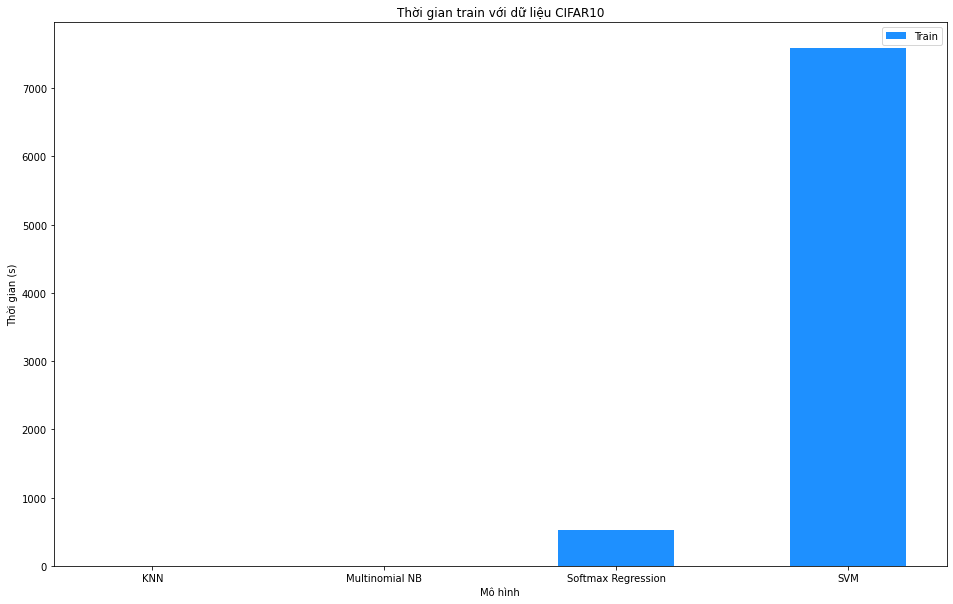

In [156]:
# Về thời gian
plt.figure(figsize=(16, 10))
plt.title('Thời gian train với dữ liệu CIFAR10')
plt.xlabel('Mô hình')
plt.ylabel('Thời gian (s)')
plt.bar(models, np.array(train_times), color='dodgerblue', width=0.5, label='Train')
plt.legend(loc='best')
plt.savefig('image/cifar10_time_comparision.png', facecolor='whitesmoke')
plt.show()

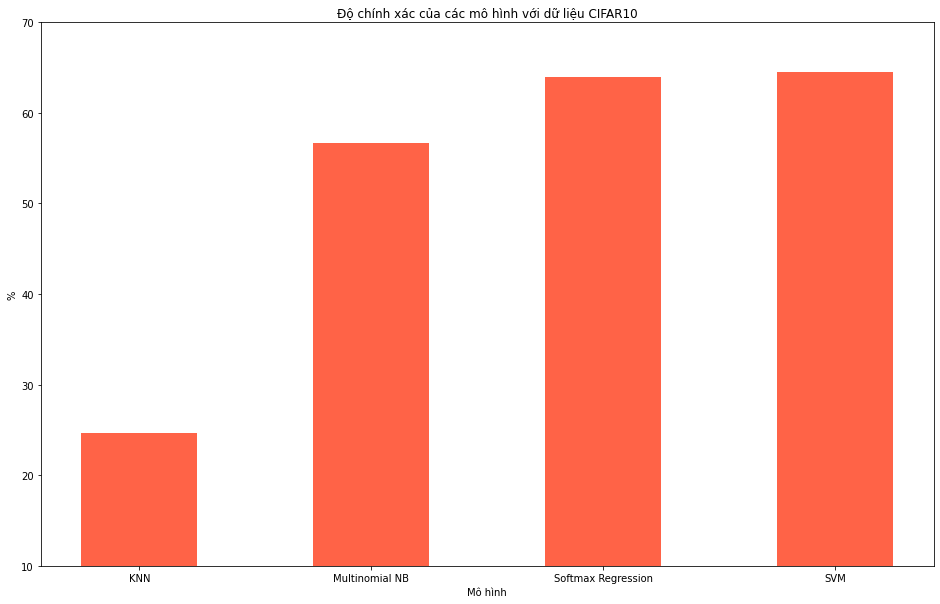

In [157]:
# Về độ chính xác
plt.figure(figsize=(16, 10))
plt.title('Độ chính xác của các mô hình với dữ liệu CIFAR10')
plt.xlabel('Mô hình')
plt.ylabel('%')
plt.ylim(10, 70)
plt.bar(models, np.array(accuracy_scores) * 100, color='tomato', width=0.5, label='Accuracy')
plt.savefig('image/cifar10_accuracy_comparision.png', facecolor='whitesmoke')
plt.show()

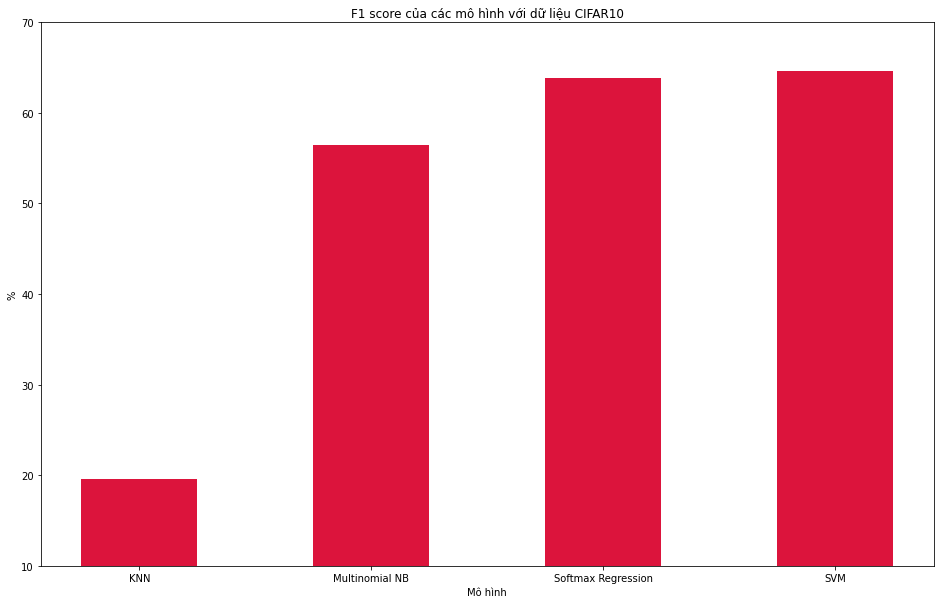

In [158]:
# Về F1 score
plt.figure(figsize=(16, 10))
plt.title('F1 score của các mô hình với dữ liệu CIFAR10')
plt.xlabel('Mô hình')
plt.ylabel('%')
plt.ylim(10, 70)
plt.bar(models, np.array(f1_scores) * 100, color='crimson', width=0.5, label='F1')
plt.savefig('image/cifar10_f1_comparision.png', facecolor='whitesmoke')
plt.show()